In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Pokemon.csv")

In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [4]:
df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].max().max()

np.int64(250)

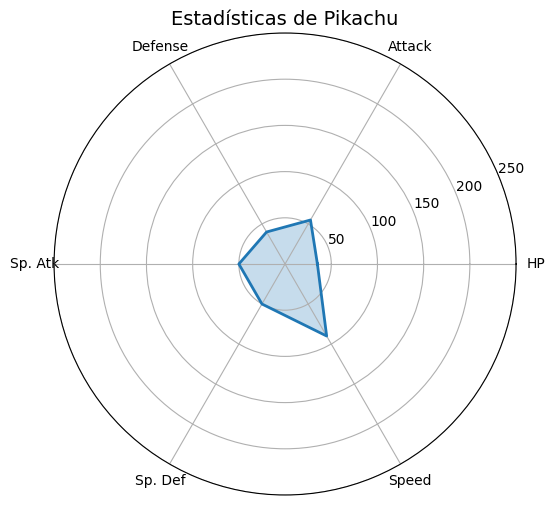

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def mostrar_radar_pokemon(nombre_pokemon):
    # Buscar el Pokémon
    pokemon = df[df['Name'].str.lower() == nombre_pokemon.lower()]
    
    if pokemon.empty:
        print(f"No se encontró el Pokémon '{nombre_pokemon}'.")
        return

    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    valores = pokemon[stats].values.flatten().tolist()
    
    # Cerrar el círculo del radar chart
    valores += [valores[0]]
    
    # Calcular ángulos
    num_vars = len(stats)
    angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angulos += [angulos[0]]

    # Crear el radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angulos, valores, linewidth=2)
    ax.fill(angulos, valores, alpha=0.25)

    # Configurar etiquetas
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(stats)
    ax.set_ylim(None, 250)
    ax.set_title(f"Estadísticas de {pokemon['Name'].values[0]}", size=14)
    plt.show()

# Ejemplo de uso
mostrar_radar_pokemon("Pikachu")

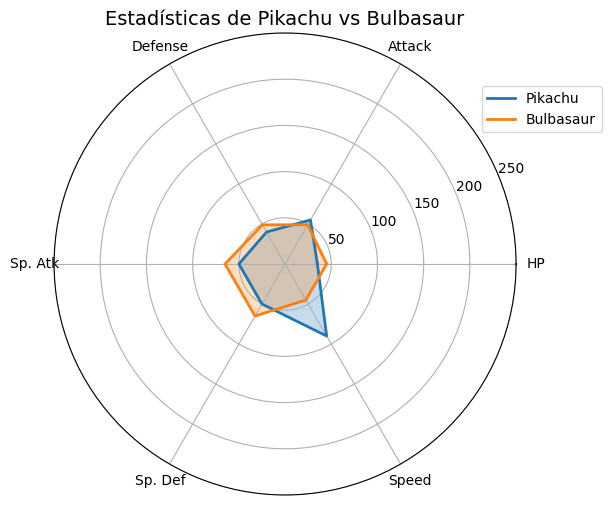

In [17]:
def mostrar_radar_pokemon_comparativa(nombre_pokemon1, nombre_pokemon2):
    # Buscar el Pokémon
    pokemon1 = df[df['Name'].str.lower() == nombre_pokemon1.lower()]
    pokemon2 = df[df['Name'].str.lower() == nombre_pokemon2.lower()]
    
    if pokemon1.empty or pokemon2.empty:
        print(f"No se encontró el Pokémon.")
        return

    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    valores1 = pokemon1[stats].values.flatten().tolist()
    valores2 = pokemon2[stats].values.flatten().tolist()
    
    # Cerrar el círculo del radar chart
    valores1 += [valores1[0]]
    valores2 += [valores2[0]]
    
    # Calcular ángulos
    num_vars = len(stats)
    angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angulos += [angulos[0]]

    # Crear el radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angulos, valores1, linewidth=2, label=nombre_pokemon1)
    ax.fill(angulos, valores1, alpha=0.25)
    ax.plot(angulos, valores2, linewidth=2, label = nombre_pokemon2)
    ax.fill(angulos, valores2, alpha=0.25)
    ax.legend(bbox_to_anchor=(1.2,0.9))

    # Configurar etiquetas
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(stats)
    ax.set_ylim(None, 250)
    ax.set_title(f"Estadísticas de {nombre_pokemon1} vs {nombre_pokemon2}", size=14)
    plt.show()
    # plt.legend()

# Ejemplo de uso
mostrar_radar_pokemon_comparativa("Pikachu","Bulbasaur")

In [23]:
# pip install ipywidgets


In [18]:
# boton = w.Button(description="Click Me")
# # out = w.Output()
# click = 0
# def saluda(boton):
#     global click
#     click +=1
#     boton.description = f"Apretado {click} veces"
    

# boton.on_click(saluda)


# display(boton)

In [19]:
# import ipywidgets.widgets as w
# dd = w.Dropdown(options=["a", "b", "tupri"])
# out = w.Output()




# def buscatupri(change):
#     if change['type'] == 'change' and change['name'] == 'value':
#         if change['new'] == "tupri":
#             with out:
#                 print("Iujuuuuuu!")



# dd.observe(buscatupri)


# display(dd, out)

https://ipywidgets.readthedocs.io/en/8.1.5/examples/Widget%20List.html

In [21]:
from IPython.display import clear_output
import ipywidgets.widgets as w

In [25]:
drop1 = w.Dropdown(options=df.loc[:, "Name"].unique())
drop2 = w.Dropdown(options=df.loc[:, "Name"].unique())

out1 = w.Output()
out2 = w.Output()

out_comparativo = w.Output()

out_foto1 = w.Output()
out_foto2 = w.Output()

import requests

pokemon1 = "Bulbasaur"
pokemon2 = "Pikachu"

def mostrar_pokemon1(change):
    global pokemon1, pokemon2
    if change['type'] == 'change' and change['name'] == 'value':
        nombre_pokemon = change['new']
        drop2.value
        with out1:
            clear_output(wait=True)
            mostrar_radar_pokemon(nombre_pokemon)
        with out_comparativo:
            clear_output(wait=True)
            mostrar_radar_pokemon_comparativa(nombre_pokemon, pokemon2)
        
        pokemon1 = nombre_pokemon

        with out_foto1:
            # llamamos a la api
            clear_output(wait=True)
            print(f"Aqui iria la foto de {nombre_pokemon}")


def mostrar_pokemon2(change):
    global pokemon1, pokemon2
    if change['type'] == 'change' and change['name'] == 'value':
        nombre_pokemon = change['new']
        with out2:
            clear_output(wait=True)
            mostrar_radar_pokemon(nombre_pokemon)
        with out_comparativo:
            clear_output(wait=True)
            mostrar_radar_pokemon_comparativa(pokemon1, nombre_pokemon)
        pokemon2 = nombre_pokemon
    
        with out_foto2:
            # llamamos a la api
            clear_output(wait=True)
            print(f"Aqui iria la foto de {nombre_pokemon}")



drop1.observe(mostrar_pokemon1)
drop2.observe(mostrar_pokemon2)


caja1 = w.HBox([drop1, drop2],  layout=w.Layout(justify_content='space-between') )
caja2 = w.HBox([out1,out_comparativo,  out2],  layout=w.Layout(justify_content='space-between') )
caja3 = w.HBox([out_foto1, out_foto2],  layout=w.Layout(justify_content='space-between') )

caja_final = w.VBox([caja1, caja2, caja3])

display(caja_final)